In [1]:
import fairbench as fb
import numpy as np

In [3]:
train = fb.read_csv("adult/adult.data", header=None, skipinitialspace=True)
test = fb.read_csv("adult/adult.test", header=None, skipinitialspace=True, skiprows=[0])

In [4]:
numeric = [0, 4, 11, 12]
categorical = [1, 3, 5, 6]

x_train = fb.features(train, numeric, categorical)
y_train = (train[14]==">50K").values

x_test = fb.features(test, numeric, categorical)
y_test = (test[14]==">50K.").values

x_train_scaled = sklearn.preprocessing.MinMaxScaler().fit_transform(x_train)
x_test_scaled = sklearn.preprocessing.MinMaxScaler().fit_transform(x_test)

In [5]:
import sklearn
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr = lr.fit(x_train_scaled, y_train)
predictions_lr = lr.predict(x_test_scaled)

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree = tree.fit(x_train_scaled, y_train)
predictions_tree = tree.predict(x_test_scaled)

In [20]:
sensitive = fb.Fork(race=fb.categories@test[8], gender=fb.categories@test[9], _prefix=None).intersectional()

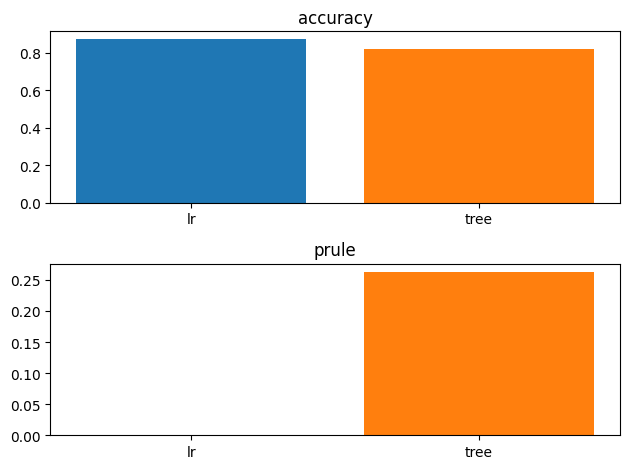

accuracy,0.8699426266603806
prule,0.0
accuracy,0.8173263961717515
prule,0.2627118644067796


In [47]:
report_lr = fb.multireport(sensitive=sensitive, predictions=predictions_lr, labels=y_test)
report_tree = fb.multireport(sensitive=sensitive, predictions=predictions_tree, labels=y_test)

report = fb.Fork(lr=fb.tokwargs(accuracy=report_lr.mean["accuracy"], prule=report_lr.minratio["pr"]), 
                 tree=fb.tokwargs(accuracy=report_tree.mean["accuracy"], prule=report_tree.minratio["pr"]))
fb.visualize(report)